In [2]:
from bokeh.io import output_notebook
from RootInteractive.Tools.aliTreePlayer import *
from RootInteractive.InteractiveDrawing.bokeh.bokehDrawSA import *
from RootInteractive.Tools.aliTreePlayer import *
from bokeh.io import curdoc
import numpy as np
import os
import sys
from ROOT import TFile, gSystem
from RootInteractive.InteractiveDrawing.bokeh.bokehDrawSA import *
from RootInteractive.MLpipeline.NDFunctionInterface import  DataContainer, Fitter, RandomForest
import plotly.express as px
import time
import pickle
from IPython.display import Image, clear_output
from RootInteractive.InteractiveDrawing.bokeh.CDSCompress import *
#
from fastSimulation import *

Welcome to JupyROOT 6.20/08
x bokehVisJS3DGraph.ts
x HistogramCDS.ts
x Histo2dCDS.ts
Import  CDSCompress.ts


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
inputData = "${fastMCKalman}/data/testTPCmuons/fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fastParticleMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fastParticleMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fastParticleMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fastParticleMS.root


Warning in <TClassTable::Add>: class ROOT::VecOps::RVec<int> already in TClassTable
Warning in <TClassTable::Add>: class ROOT::VecOps::RVec<float> already in TClassTable


In [4]:
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(tree)
tree.SetAlias("p0MC","part.fParamMC[0].fP[0]")
tree.SetAlias("p0In","part.fParamIn[1].fP[0]")

tree.SetAlias("p1MC","part.fParamMC[0].fP[1]")
tree.SetAlias("p1In","part.fParamIn[1].fP[1]")

tree.SetAlias("p2MC","part.fParamMC[0].fP[2]")
tree.SetAlias("p2In","part.fParamIn[1].fP[2]")

tree.SetAlias("p3MC","part.fParamMC[0].fP[3]")
tree.SetAlias("p3In","part.fParamIn[1].fP[3]")

tree.SetAlias("p4MC","part.fParamMC[0].fP[4]")
tree.SetAlias("p4In","part.fParamIn[1].fP[4]")

tree.SetAlias("pMC","part.fParamMC[0].fData.P()")
tree.SetAlias("pIn","part.fParamIn[1].fData.P()")

tree.SetAlias("Res0MC","(p0In)/p0MC")
tree.SetAlias("Res1MC","(p1In-p1MC)/p1MC")
tree.SetAlias("Res2MC","(p2In-p2MC)/p2MC")
tree.SetAlias("Res3MC","(p3In-p3MC)/p3MC")
tree.SetAlias("Res4MC","(p4In-p4MC)/p4MC")
tree.SetAlias("RespMC","(pIn-pMC)/pMC")

tree.SetAlias("sigmaqPt0","sqrt(part.fParamIn[1].fC[14])")
tree.SetAlias("sigmaPtRel0","sigmaqPt0*ptMC")
tree.SetAlias("LArm","getStat(2)")

True

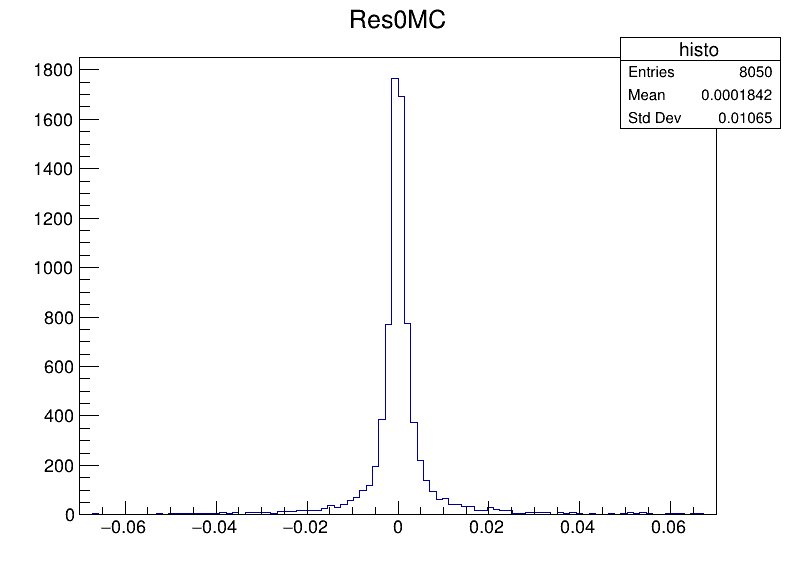

In [5]:
c0 = ROOT.TCanvas("myCanvasName0","The Canvas Title0",800,600)
tree.Draw("Res0MC>>histo(100,-0.07,0.07)","part.")
c0.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName1


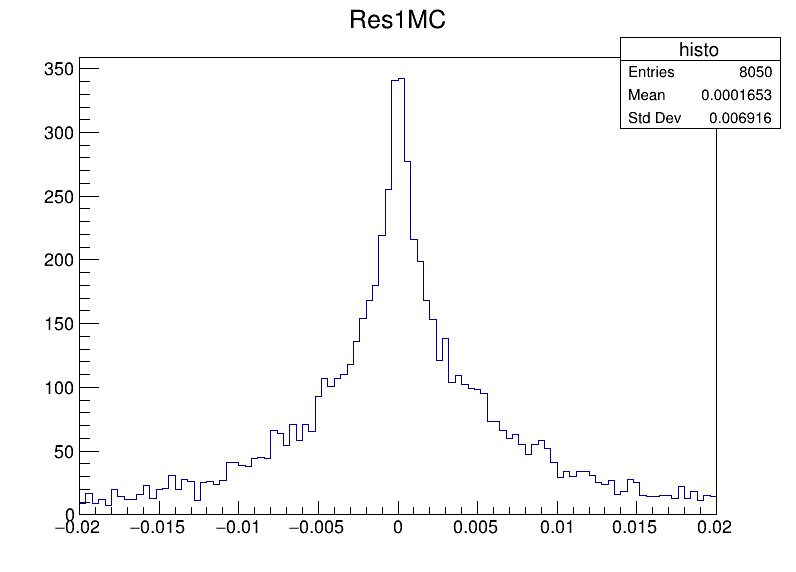

In [115]:
c1 = ROOT.TCanvas("myCanvasName1","The Canvas Title1",800,600)
tree.Draw("Res1MC>>histo(100,-0.02,0.02)")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName2


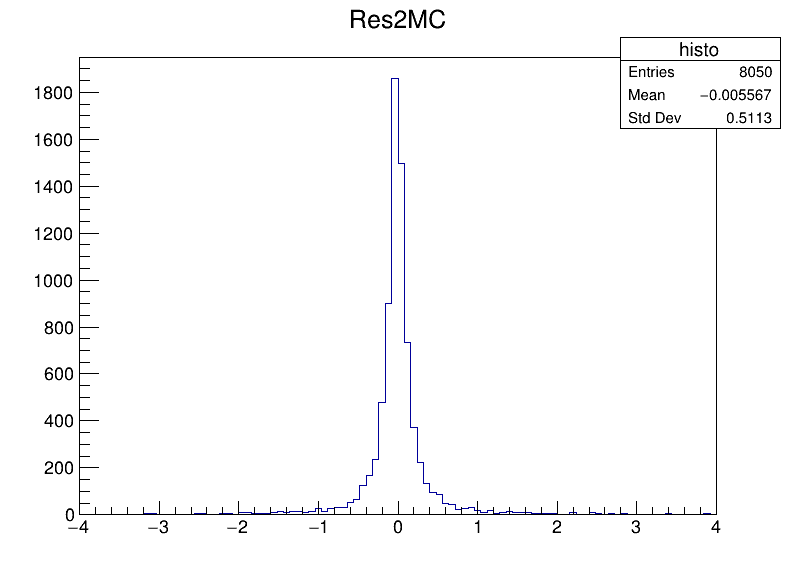

In [116]:
c2 = ROOT.TCanvas("myCanvasName2","The Canvas Title2",800,600)
tree.Draw("Res2MC>>histo(100,-4,4)")
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName3


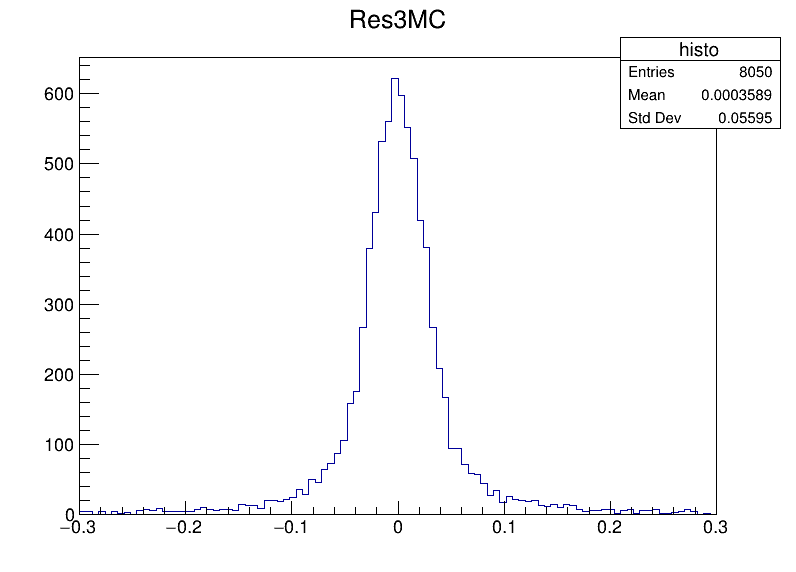

In [117]:
c3 = ROOT.TCanvas("myCanvasName3","The Canvas Title3",800,600)
tree.Draw("Res3MC>>histo(100,-0.3,0.3)")
c3.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName4


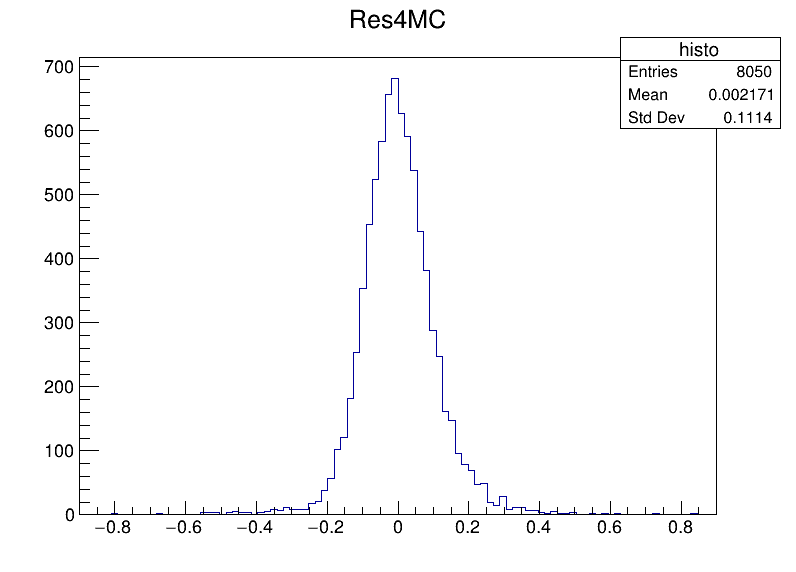

In [118]:
c4 = ROOT.TCanvas("myCanvasName4","The Canvas Title4",800,600)
tree.Draw("Res4MC>>histo(100,-0.9,0.9)")
c4.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamep


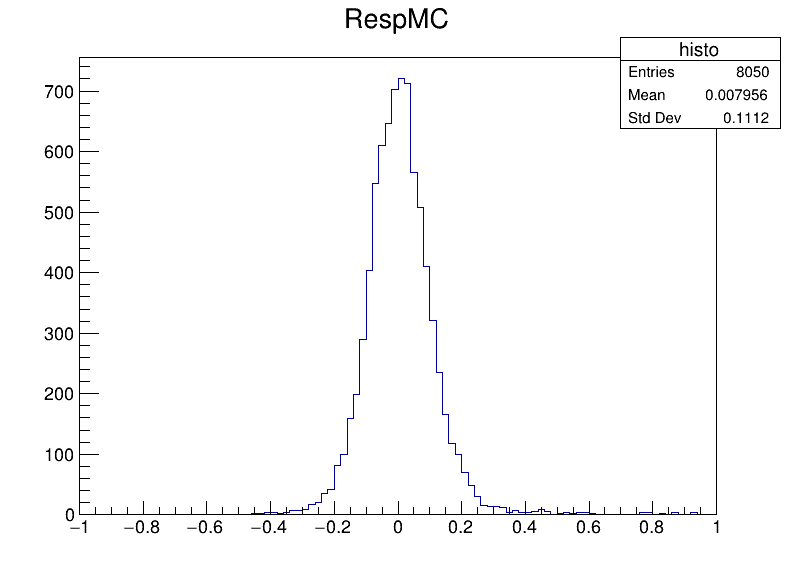

In [119]:
cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
tree.Draw("RespMC>>histo(100,-1,1)")
cp.Draw()

In [76]:
copyParam=["Res0MC","Res1MC","Res2MC","Res3MC","Res4MC","RespMC",
           "pidCode","LArm","sigmaqPt0","sigmaPtRel0","isSecondary","ptMC"]

defaultCut="Larm>5&&fMaxLayer>1&&sigmaqPt0>0&&sigmaPtRel0>0"

panda=tree2Panda(tree,copyParam,defaultCut,columnMask=[["_fElements",""]],nEntries=100000)

In [77]:
panda.head(100)

,Res0MC,Res1MC,Res2MC,Res3MC,Res4MC,RespMC,pidCode,LArm,sigmaqPt0,sigmaPtRel0,isSecondary,ptMC
0,-0.999753,0.000044,0.077227,0.004584,0.006964,-0.005123,1,15.326650,1.609794,0.112686,True,0.07
1,-1.001927,0.000157,-0.033801,-0.075554,-0.002521,0.001580,1,59.136372,1.305868,0.091411,True,0.07
2,-0.998700,-0.000141,-0.033301,-0.006976,-0.006813,0.003566,1,11.796167,2.035579,0.142491,True,0.07
3,-0.999915,-0.000029,0.093682,0.005158,0.061046,-0.055321,1,5.777915,14.609777,1.022684,True,0.07
4,-0.999989,-0.001313,-0.120382,-0.013871,-0.007734,-0.001540,1,38.949852,0.797686,0.055838,True,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.999317,-0.000009,-0.147696,-0.012584,0.016961,-0.018529,1,16.377485,1.657410,0.116019,True,0.07
96,-0.999820,0.000123,0.088342,-0.008520,0.000049,-0.004392,1,21.324945,1.212706,0.084889,True,0.07
97,-1.000166,0.000152,-0.081338,-0.014589,-0.029399,0.029516,1,4.139869,25.026097,1.751827,True,0.07
98,-1.000453,0.000002,0.024642,0.000430,0.023528,-0.022743,1,14.136269,1.600160,0.112011,True,0.07


In [78]:
histoArray = [
    {"name": "histoRes0", "variables": ["Res0MC"], "nbins": 50},
    {"name": "histoRes1", "variables": ["Res1MC"], "nbins": 50},
    {"name": "histoRes2", "variables": ["Res2MC"], "nbins": 50},
    {"name": "histoRes3", "variables": ["Res3MC"], "nbins": 50},
    {"name": "histoRes4", "variables": ["Res4MC"], "nbins": 50}
    ]

figureArray = [
    [['Res0MC'], ["histoRes0"],{}],
    [['Res1MC'], ["histoRes1"],{}],
    [['Res2MC'], ["histoRes2"],{}],
    [['Res3MC'], ["histoRes3"],{}],
    [['Res4MC'], ["histoRes4"],{}],
    ["tableHisto", {"rowwise": False}],
    ['table'],
    {"size": 1}   
    ]

widgetParams = [
    ['range', ['ptMC']],
    ['range', ['LArm']],
    ['select', ['isSecondary']],
    ['select', ['pidCode']],
]

widgetLayoutDesc=[ [0,1],[2,3], {'sizing_mode':'scale_width'} ]
figureLayoutDesc=[
    [0,1,2,3,4, {'plot_height':800}],
    {'plot_height':1000,'sizing_mode':'scale_width'}
]
tooltips = [("ptMC","@ptMC")]
output_file("fastMCKalmanResiduals.html")

figC=bokehDrawSA.fromArray(panda, "pidCode>-1", figureArray, widgetParams,
                           layout=figureLayoutDesc,sizing_mode='scale_width',
                           widgetLayout=widgetLayoutDesc,nPointRender=5000,
                           rescaleColorMapper=True,arrayCompression=arrayCompressionRelative8,histogramArray=histoArray)

compressCDSPipe
Compress 1 Res0MC .* [('relative', 8), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 7026 188919 0.037190541978308164 1 Res0MC
Compress 2 Res1MC .* [('relative', 8), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 98581 188919 0.5218162281189292 2 Res1MC
Compress 3 Res2MC .* [('relative', 8), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 102555 188919 0.5428516983469106 3 Res2MC
Compress 4 Res3MC .* [('relative', 8), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 90397 188919 0.4784960750374499 4 Res3MC
Compress 5 Res4MC .* [('relative', 8), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 84537 188919 0.44747749035300843 5 Res4MC
Compress 6 ptMC .* [('relative', 8), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 339 188917 0.0017944388276332993 6 ptMC
Compress 7 LArm .* [('relative', 8), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 33539 188917 0.17753299067844608 7 LArm
Compress 8 isSecondary .* [('relati